<a href="https://colab.research.google.com/github/rita-milani/Life_Insurance_PyCaret/blob/main/Life_Insurance_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

##**1. Life Insurance Premium: what is it and how is it affected?**
Life Insurance is a mechanism that provides financial security for your family in the event of your death. It is a contract between an insurance company and an insurance policy holder, where the company pledges to pay a sum of money to your family after you pass, in exchange for a premium (charge) that you pay. 

<p align=center>
<img src="https://images.unsplash.com/photo-1475503572774-15a45e5d60b9?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" width="40%"></p>

Photo by <h6><a href="https://unsplash.com/es/@goodmood77?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Natalya Zaritskaya</a> on <a href="https://unsplash.com/s/photos/life-insurance?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></h6>
  

####**What affects the premium of an insurance policy?**

According to [Experian](https://www.experian.com/blogs/ask-experian/factors-that-affect-life-insurance-costs/#:~:text=Some%20factors%20that%20affect%20life,cost%2Dfits%2Dall%20policies.), these are the main factors that impact your premium: 

**1. Age:** the younger you are, the more time you have to pay the premium.

**2. Gender**: statistically, women live longer, so they have more time to pay the premium, and thus, pay less for it.

**3. Health:** medical conditions such as high blood pressure, heart disease or cancer, ot other conditions that may reduce you lifespan imply in a higher premium. 

**4. Family Medical Score:** besides your own health, your family health history is also relevant to your life insurance cost, as you may inherit some conditions.

**5. Lifestyle:** habits like heavy drinking and smoking play a role on your health, and thus, on your lifespan. But factors like practicing hardcore sports or even criminal record may also increase your premium.

**6. Occupation:** occupations that increase your risk to your life, such as firefighters, aircraft pilots and police officers, among others, also influence on your charges.

**7. Policy Type:** there are basically 3 insurance types, that affects your costs: term (when you pay for a definite amount of years), wholelife (when you pay until the end of your life), and universal (more flexible regarding premium and benefits).

**8. Coverage Amount:** the amount your family will receive. Some insurers recommend a coverage that's 20 to 30 times your annual salary.

**9. Your credit:** some states in the US allow the use of your credit score as a basis to your premium. The better the score, the slower the premium. 

####**Life Insurance in the US x Brazil**

[Forbes Advisor Survey](https://www.forbes.com/advisor/life-insurance/life-insurance-statistics/)  reports that about 52% of Americans have life insurance, considering individual and workplace insurance. And only 25% are covered by employer-based life insurance. 

In Brazil, by contrast, only 17% of the population has life insurance, according to Fenaprevi (Federação Nacional de Previdência Privada e Vida), of which 58% are group employer-based policies. Besides all of the forementioned factors, income level is a relevant factor for taking out an insurance policy, as mostly insured belong to classes A and B. 

####**How much will an new insured pay based on his individual characteristics?**

Given all of this information, **the aim of this project is to predict accurately the individual life insurance premium**. We have a database containing individual life insurance clients and characteristics such as age, smoking option, BMI (Body Mass Index - the greater, the greater the risk of diseases such as heart diseases, diabetes, cancer and others), children and region. Based on these factors, we are going to **build a model to predict the cost of life insurance for an individual** through **Machine Learning** using **PyCaret** library, a resource that **allows performing several modeling simulations with a reduced amount of code**. 

But before this, we will perform an Explanatory Data Analysis in order to understand the **characteristics and distribution of factors** among the client population. How factors like **smoking and BMI are distributed among the population**? How do they **affect insurance cost?** Is it possible to see graphically any **relation between lifestyle choices and insurance premium?**

Let's start with our analysis!



###**1.1 Importing libraries and dataset**
First of all, we import all the libraries we will use. Then, we proceed with importing the dataset. The original one was obtained in [Kaggle](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction), but there is also a copy in this [GitHub repository](https://raw.githubusercontent.com/rita-milani/data_science_na_pratica/master/dataset/insurance.csv).

In [6]:
pip install pycaret -q

In [7]:
# import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_palette(['#ff9900', '#146eb4', '#000000', '#232f3e', '#064B73', '#f2f2f2'])
%matplotlib inline

from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# enable PyCaret
from pycaret.utils import enable_colab
enable_colab()

from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

Colab mode enabled.


In [8]:
# import data
data_path='https://raw.githubusercontent.com/rita-milani/data_science_na_pratica/master/dataset/insurance.csv'
df = pd.read_csv(data_path, sep='[,]', engine='python')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

##**2. Exploratory Data Analysis (EDA)**
As explained in the introduction, we will perform an EDA in order to understand how the characteristics that determine the life insurance premium are distributed among the population, and if they are correlated to insurance costs, as expected. 

For this, we will begin by exploring the dataset chacteristics such as size, null-values, data type, and then we will follow with the graphic analysis of the variables, using `Seaborn` charts. After this, we will analyse a descriptive statistics table to identify basic measures such as mean, median and standard deviation, and check for patterns like outliers. 

Finally, we will use Box Plots in order to detect/confirm outliers, extreme values that can bias the model, and remove them from our dataset. 

####**2.1 Dataset Characteristics**

We can see that:
- it is a large dataset with 7 variables and 1338 entries.
- there are no null-values to be dealt with.
- the series are categoric (object) and numeric (float and integer).
- most of the variables assume multiple values, only two are binary (smoke and sex). 

In [9]:
# verify dataframe shape
print('The dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataframe has 1338 rows and 7 columns.


In [10]:
# null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# unique values for each variable
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

###**2.2 Population Distribution**###
What is the frequency of each variable? 

Does the dataset has more male or female clients? 

What is their age distribution? What is the share of smokers and non-smokers? 

In which region do they live? 

We will build some charts using `Seaborn` library in order to identify these attributes.

In [12]:
# clients distribution by sex
client_gender = df.sex.value_counts(normalize=True).reset_index()
print('Gender Distribution\n', client_gender)

# clients distribution by age
df['age_range'] = pd.cut(df['age'], [17, 30, 50, 65], labels = ['18-30', '31-50', '51-64'])
client_age = df.age_range.value_counts(normalize=True, sort=False)
print('\nAge Distribution\n', client_age)

# clients distribution by children
client_children = df.children.value_counts(normalize=True)
print('\nChildren Distribution\n', client_children)

# clients distribution by region
client_region = df.region.value_counts(normalize=True)
print('\nRegion Distribution\n', client_region)

# clients distrbution by smoker option
client_smoker = df.smoker.value_counts(normalize=True)
print('\nSmoker Distribution\n', client_smoker)

# clients distribution by bmi
df['bmi_range'] = pd.cut(df['bmi'], [15.9, 18.5, 25, 53.13], labels=['underweight', 'normal', 'overweight'])
dbmi = df.bmi_range.value_counts(normalize=True, sort=False)
print('\nBMI Distribution\n', dbmi)

Gender Distribution
     index       sex
0    male  0.505232
1  female  0.494768

Age Distribution
 18-30    0.331839
31-50    0.402093
51-64    0.266069
Name: age_range, dtype: float64

Children Distribution
 0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

Region Distribution
 southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

Smoker Distribution
 no     0.795217
yes    0.204783
Name: smoker, dtype: float64

BMI Distribution
 underweight    0.015695
normal         0.168909
overweight     0.815396
Name: bmi_range, dtype: float64


By the distributions above, we can see that:
- men and women are evenly distributed.
- 31-50 age range has a greater share.
- most clients have no children.
- clients evenly distributed among regions.
- most of the clients are non-smokers.
- most of the clients are overweight.

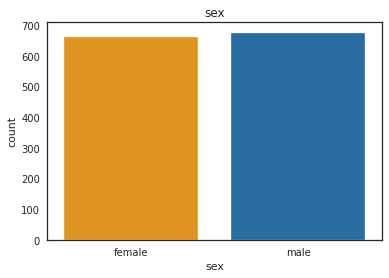

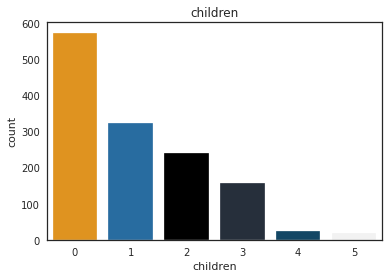

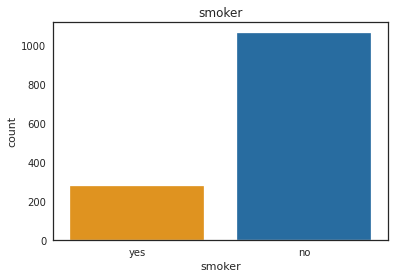

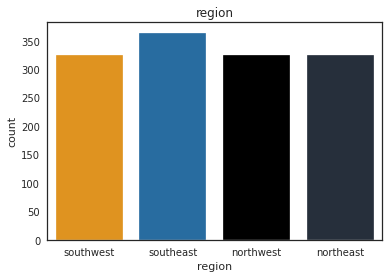

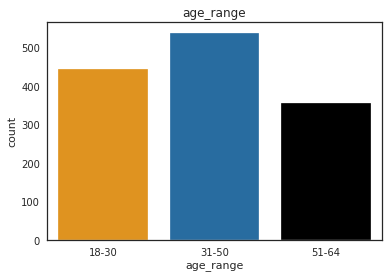

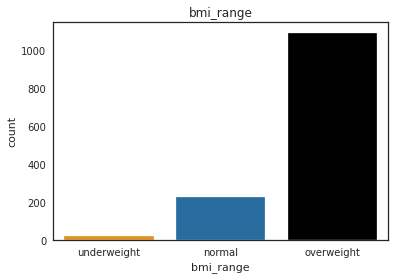

In [13]:
# creating the plots
plt.figure()
x=df.drop(['age', 'bmi', 'charges'], axis=1)

for i in x.columns:
  sns.countplot(x[i]).set(title=i)
  plt.show()

# for p in ax.patches:
#   s='{:.0f}'.format(y)
#   x = p.get_x() + p.get_width()/2
#   y = p.get_height()
#   ax.annotate(s, (x, y), ha='center', va='center')

# for ax in [ax1, ax2, ax3, ax4, ax5, ax6]: 
#   for c in ax.containers: 
#     ax.bar_label(c, label_type='edge')

###**2.3 Smokers Characteristics**
As being a smoker is a risk factor for anyone's health that impacts insurance costs, we are going to analyze the characteristics of smoker clients (their age, sex, BMI and region).


####**Smoker by Gender**
As we can see below, the percentage of men who smoke is greater than the percentage of women who smoke. 

In [14]:
# smoker by gender
smoker_gender = df.groupby(['sex'])['smoker'].value_counts(normalize=True)
print('Smoker by Gender\n\n', df.groupby(['sex'])['smoker'].value_counts(normalize=True))

Smoker by Gender

 sex     smoker
female  no        0.826284
        yes       0.173716
male    no        0.764793
        yes       0.235207
Name: smoker, dtype: float64


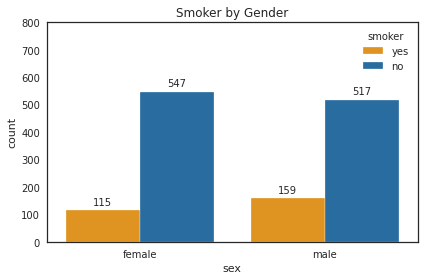

In [15]:
# plot smoker by gender
fig, ax = plt.subplots()

sns.countplot(x='sex', hue='smoker', data=df).set(title='Smoker by Gender')
ax.set_ylim(0,800)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()

####**Smoker by Age**
As we can see below, the share of smokers is roughly the same for the ranges 18-30 and 31-50 (21%), and smaller for ages 51-64 (18%). 

In [16]:
# smoker by age
smoker_age = df.groupby(['age_range'])['smoker'].value_counts(normalize=True)
print('Smoker by Age:\n\n', smoker_age)

Smoker by Age:

 age_range  smoker
18-30      no        0.786036
           yes       0.213964
31-50      no        0.786245
           yes       0.213755
51-64      no        0.820225
           yes       0.179775
Name: smoker, dtype: float64


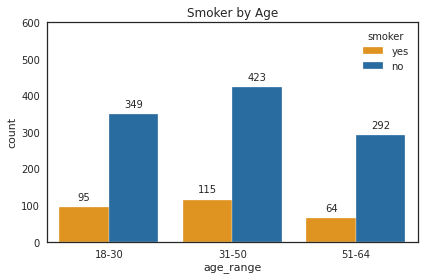

In [17]:
# plot smoker by age

fig, ax = plt.subplots()

sns.countplot(x='age_range', hue='smoker', data=df, ax=ax).set(title='Smoker by Age')
ax.set_ylim(0,600)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()

####**Smoker by Region**
We will see below that Southeast and Northeast have the greatest share of smokers, with 25% and 20%, respectively.

In [18]:
# smoker by region
smoker_region = df.groupby(['region'])['smoker'].value_counts(normalize=True)
print('Smoker by Region\n\n', smoker_region)

Smoker by Region

 region     smoker
northeast  no        0.793210
           yes       0.206790
northwest  no        0.821538
           yes       0.178462
southeast  no        0.750000
           yes       0.250000
southwest  no        0.821538
           yes       0.178462
Name: smoker, dtype: float64


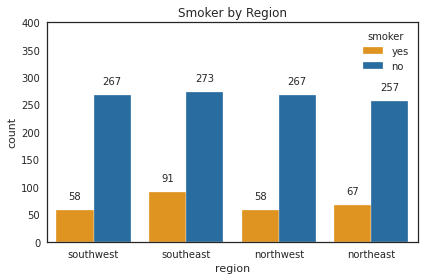

In [19]:
# plot smoker by region
fig, ax = plt.subplots()

sns.countplot(x='region', hue='smoker', data=df, ax=ax).set(title='Smoker by Region')
ax.set_ylim(0,400)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()  

####**Smoker by BMI**
As we can see, the greatest share of smokers is in the underweight group (24%), and the smallest share goes to the overweight group (20%). But we most also notice that the underweight group is the smallest, with only 21 clients, so the smallest amount of smokers will impact greatly on the total.

In [20]:
# smoker by bmi
smoker_bmi = df.groupby(['bmi_range'])['smoker'].value_counts(normalize=True)
print('Smoker by BMI\n\n', smoker_bmi)

Smoker by BMI

 bmi_range    smoker
underweight  no        0.761905
             yes       0.238095
normal       no        0.778761
             yes       0.221239
overweight   no        0.799267
             yes       0.200733
Name: smoker, dtype: float64


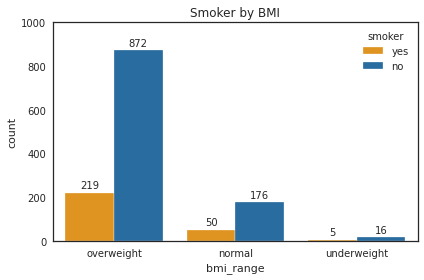

In [21]:
# plot smoker by bmi
fig, ax = plt.subplots()

sns.countplot(x='bmi_range', hue='smoker', order=df['bmi_range'].value_counts().index, data=df, ax=ax).set(title='Smoker by BMI')
ax.set_ylim(0,1000)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

  
plt.tight_layout()

####**Smokers by Gender, Age and Region**
Now, we will deepen our analysis by checking which group has the highest share of smokers, classifying them by gender, age and also region. We can notice that the greatest share of smokers are:

**1.** Male between 51-64 from the Southeast (**40.5%**);

**2.** Women between 51-64 from the Southeast (**37.0%**);

**3.** Women between 18-30 from the Southeast (**35.0%**);

**4.** Men between 31-50 from the Southeast (**34.3%**).

In [22]:
# smokers by sex, age and region
smoker_spec = df.groupby(['smoker', 'sex', 'age_range'])['region'].value_counts(normalize=True)

print('Smokers by gender and region:\n\n', smoker_spec)

Smokers by gender and region:

 smoker  sex     age_range  region   
no      female  18-30      northwest    0.258621
                           southeast    0.252874
                           southwest    0.247126
                           northeast    0.241379
                31-50      southeast    0.273973
                           southwest    0.260274
                           northeast    0.232877
                           northwest    0.232877
                51-64      southwest    0.266234
                           northeast    0.253247
                           northwest    0.253247
                           southeast    0.227273
        male    18-30      southeast    0.274286
                           northeast    0.251429
                           northwest    0.251429
                           southwest    0.222857
                31-50      northwest    0.274510
                           southeast    0.254902
                           northeast    0.235294


###**2.4 BMI Characteristics**
As for smokers, having a big BMI (Body Mass Index) may bring risks for the health.Being overweight may be a relevant factor for diseases like cardiovascular diseases, diabetes, cancer and others. Thus, we perform this analysis to understand the prevalence of overweight in the population (clients). 

####**BMI by Gender**
We can see that over 80% of both men and women are overweight.

In [23]:
# bmi by gender
bmi_gender = df.groupby(['sex'])['bmi_range'].value_counts(normalize=True)
print('BMI by Gender\n\n', bmi_gender)

BMI by Gender

 sex                
female  overweight     0.802115
        normal         0.178248
        underweight    0.019637
male    overweight     0.828402
        normal         0.159763
        underweight    0.011834
Name: bmi_range, dtype: float64


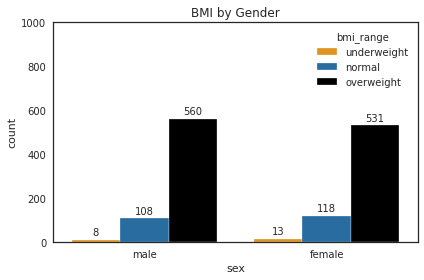

In [24]:
# plot bmi by gender
fig, ax = plt.subplots()

sns.countplot(x='sex', hue='bmi_range', order=df['sex'].value_counts().index, data=df, ax=ax).set(title='BMI by Gender')
ax.set_ylim(0,1000)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

  
plt.tight_layout()

####**BMI by Age**
We can notice that the share of overweight increases with the age. Life style and difficulty to lose weight play a role in keeping people overweight. 

In [25]:
# bmi by age
bmi_age = df.groupby(['age_range'])['bmi_range'].value_counts(normalize=True)
print('BMI by Age\n\n', bmi_age)

BMI by Age

 age_range             
18-30      overweight     0.765766
           normal         0.209459
           underweight    0.024775
31-50      overweight     0.832714
           normal         0.156134
           underweight    0.011152
51-64      overweight     0.851124
           normal         0.137640
           underweight    0.011236
Name: bmi_range, dtype: float64


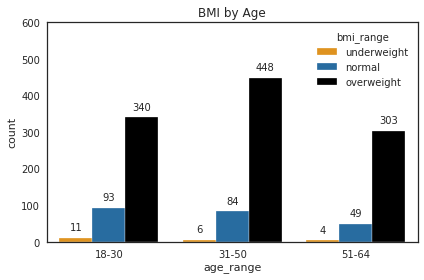

In [26]:
# plot bmi by age
fig, ax = plt.subplots()

sns.countplot(x='age_range', hue='bmi_range', data=df, ax=ax).set(title='BMI by Age')
ax.set_ylim(0,600)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

  
plt.tight_layout()

####**BMI by Region**
We notice that Southeast and Southwest have the greatest share of population overweight, with 88% and 83%, respectively.

In [27]:
# bmi by region
bmi_region= df.groupby(['region'])['bmi_range'].value_counts(normalize=True)
print('BMI by Region\n\n', bmi_region)

BMI by Region

 region                
northeast  overweight     0.743827
           normal         0.225309
           underweight    0.030864
northwest  overweight     0.784615
           normal         0.193846
           underweight    0.021538
southeast  overweight     0.887363
           normal         0.112637
           underweight    0.000000
southwest  overweight     0.836923
           normal         0.150769
           underweight    0.012308
Name: bmi_range, dtype: float64


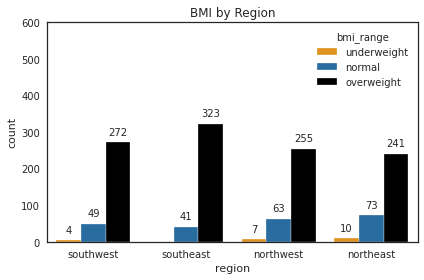

In [28]:
# plot bmi by region
fig, ax = plt.subplots()

sns.countplot(x='region', hue='bmi_range', data=df, ax=ax).set(title='BMI by Region')
ax.set_ylim(0,600)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

  
plt.tight_layout()

####**BMI by Smoker Status**
We can see below that, from the smokers group, 80% are overweight, 18% have normal weight, and 2% are underweight. 


In [29]:
# bmi by smoker
bmi_smoker = df.groupby(['smoker'])['bmi_range'].value_counts(normalize=True)
print('BMI by Smoker Status\n\n', bmi_smoker)

BMI by Smoker Status

 smoker             
no      overweight     0.819549
        normal         0.165414
        underweight    0.015038
yes     overweight     0.799270
        normal         0.182482
        underweight    0.018248
Name: bmi_range, dtype: float64


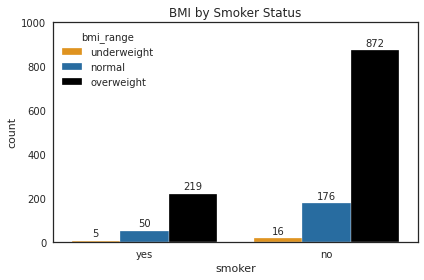

In [30]:
# plot bmi by smoker status
fig, ax = plt.subplots()

sns.countplot(x='smoker', hue='bmi_range', data=df, ax=ax).set(title='BMI by Smoker Status')
ax.set_ylim(0,1000)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+20, s='{:.0f}'.format(height), ha='center')

  
plt.tight_layout()

####**BMI by Gender, Age and Region**
We do the same exercise with BMI: where are the greatest shares of clients with higher BMI (overweight)? 

**1.** Male between 18-30 from the Southeast (**32.5%**);

**2.** Women between 18-30 from the Southeast (**32.0%**);

**3.** Women between 31-50 from the Southeast (**30.0%**);

**4.** Men between 51-64 from the Southeast (**29.8%**).

In [31]:
# bmi by sex, age and region
print('BMI by age, sex and region:\n\n', df.groupby(['bmi_range', 'sex', 'age_range'])['region'].value_counts(normalize=True))

BMI by age, sex and region:

 bmi_range    sex     age_range  region   
underweight  female  18-30      northeast    0.666667
                                southwest    0.333333
                     31-50      southwest    0.500000
                                northeast    0.250000
                                northwest    0.250000
                     51-64      northwest    0.666667
                                northeast    0.333333
             male    18-30      northwest    0.600000
                                northeast    0.400000
                     31-50      northeast    0.500000
                                northwest    0.500000
                     51-64      northeast    1.000000
normal       female  18-30      northwest    0.346939
                                southwest    0.265306
                                northeast    0.244898
                                southeast    0.142857
                     31-50      northeast    0.441860
          

###**2.5 Charges by Characteristics**
Now that we saw the clients characteristics, including the incidence of smokers and overweight clients, which can affects the health and longevity, we will analyse the incidence of costs by each of the available characteristics. *Ex-ante*, **we expect that regions/populations with greater incidence of smoking and obesity are targeted by higher insurance charges.**  

####**Charges by Gender**
Doing a simple exercise, we want to understand the incidence of insurance charges on each characteristic. In this case, is there a significatively difference on the charge amount between gender?

The plot shows that insured male pay the higher price, 13.9k, while insured female pay around 12.5k.

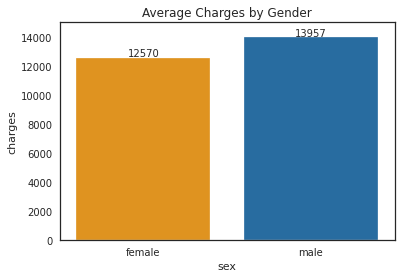

In [32]:
# plot charges by sex
fig, ax = plt.subplots()
sns.barplot('sex', 'charges', ci=None, data=df, ax=ax).set(title='Average Charges by Gender')
ax.set_ylim(0,15000)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.show()  

####**Charges by Age**
After observing there is a slight difference between male and female charges on average, we proceed to check if there is any difference on average charges by age. **It is expected that, as a person gets older, the risks of contracting a disease increase. So, we expect that the charges increase with age.**

The plot confirms our expectations and shows that **the higher age range(51-64) pays approximately the double from the younger age range (18-30).**

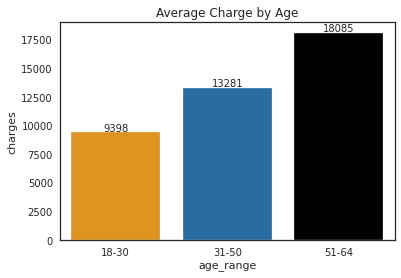

In [33]:
# plot charges by age
fig, ax = plt.subplots()
sns.barplot('age_range', 'charges', ci=None, data=df, ax=ax).set(title='Average Charge by Age')

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.show()  

####**Charges by Region**
Now, we are going to check if there is any difference on average charges by region. As we observed above, **Southeast** region has a **higher incidence of smoking and obesity**. Thus, we should observe **higher charges for this region**. 

And as expected, **the Southeast region has a higher average insurance**, followed by the Northeast, while the **regions in the West have similar average charges.**

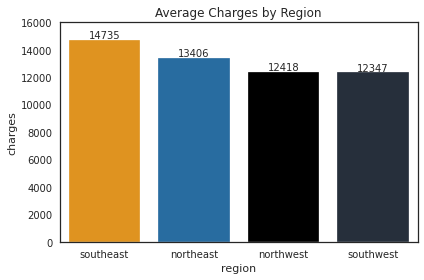

In [34]:
# plot charges by region
fig, ax = plt.subplots()
region_order = ['southeast', 'northeast', 'northwest', 'southwest']
sns.barplot('region', 'charges', ci=None, order=region_order, data=df, ax=ax).set(title='Average Charges by Region')
ax.set_ylim(0,16000)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()  

####**Charges by Smoker Status**
Is the insurance charge more expensive for smokers? 

The plot below reveals that the **average charge for smokers is about 4 times higher than for non-smokers.**

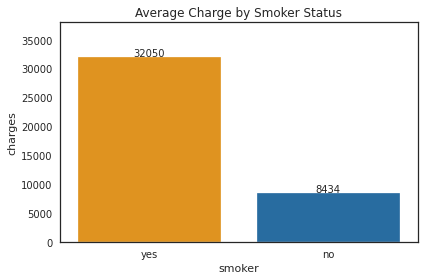

In [35]:
# plot charges by smoker
fig, ax = plt.subplots()
sns.barplot('smoker', 'charges', ci=None,  data=df, ax=ax).set(title='Average Charge by Smoker Status')
ax.set_ylim(0,38000)

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()

####**Charges by BMI**
Now, we proceed to check the average insurance charge by BMI range. As obesity is closely associated to several diseases, **we expect that clients with higher BMI pay higher charges.**

The chart below shows us that on average, **overweight clients pay almost double the charge compared to underweight clients. **

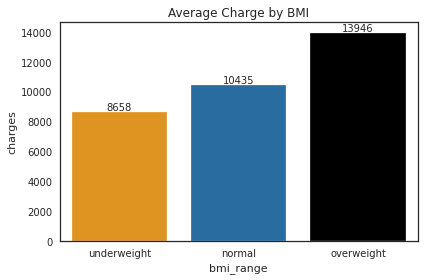

In [36]:
# plot charges by bmi
fig, ax = plt.subplots()

sns.barplot('bmi_range', 'charges', ci=None, data=df, ax=ax).set(title='Average Charge by BMI')

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


####**Charges by Smoker Status and Gender**
We can see that, for **smokers, the charges are higher on average for men**. However, for **non-smokers**, the charges are **higher for women**, which indicates there must be **another factor that increases health risks for non-smoking women**. 

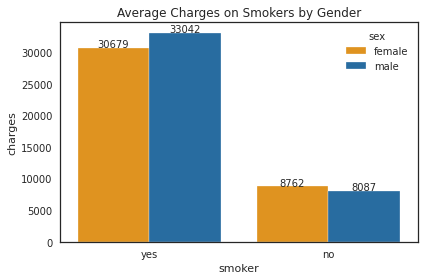

In [37]:
# mean charges by smoker option and sex
fig, ax = plt.subplots()
sns.barplot(x ='smoker', y = 'charges', hue = 'sex', ci=None, data=df, ax=ax).set(title='Average Charges on Smokers by Gender')

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()

####**Charges by Smoker Status and Age**
As we will see below, the average charges **increase according to the age for both smokers and non-smokers groups**. However, **the value for smokers is almost 4-fold the value for non-smokers**. 

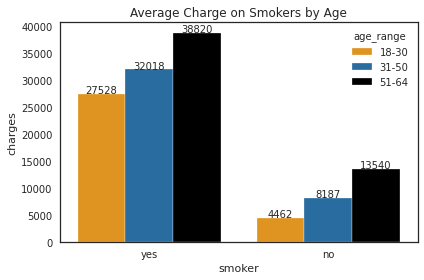

In [38]:
# charges by smoker status and age
fig, ax = plt.subplots()
sns.barplot(x='smoker', y='charges', hue='age_range', ci=None, data=df, ax=ax).set(title='Average Charge on Smokers by Age')

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


####**Charges by Smoker Status and Region**
Here we see an **interesting movement**: although we saw that **the Southeast region has the heaviest insurance charge overall**, the graph below shows us that this happens **only for smokers. For non-smokers, this region presents the second lowest price.** 

Thus, we can conclude that the **fee for smokers is what makes the region's fee so expensive, given the higher proportion of smokers in the region**. 

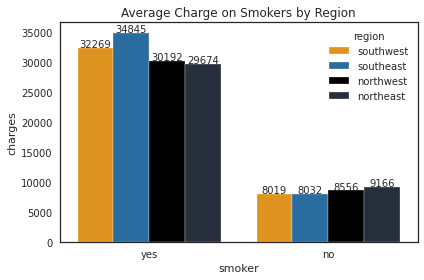

In [39]:
# charges by smoker status and region
fig, ax = plt.subplots()
sns.barplot(x='smoker', y='charges', hue='region', ci=None, data=df, ax=ax).set(title='Average Charge on Smokers by Region')

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


####**Charges by Smoker Status and BMI**
This chart is extremely interesting!  

We can see, as expected, the average charge increasing for higher BMI. However, **notice how the average charge increases for smokers with obesity: the value increases by 75%!** 

We must take into account that the charge on obese people must be higher, as we see on the non-smoking group. 

However, **if the client is obese AND smoker, the insurance value increases in a greater proportion, as do the risks for the client's health**. 

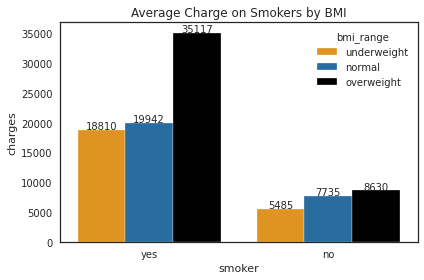

In [40]:
# charges by smoker status and region
fig, ax = plt.subplots()
sns.barplot(x='smoker', y='charges', hue='bmi_range', ci=None, data=df, ax=ax).set(title='Average Charge on Smokers by BMI')

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


####**Charges by BMI and Gender**
We notice that insurance charges on women who are underweight and with normal weight are higher than for men on the same range.

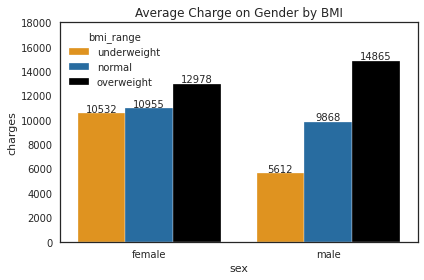

In [41]:
# charges by BMI status and gender
fig, ax = plt.subplots()
sns.barplot(x='sex', y='charges', hue='bmi_range', ci=None, data=df, ax=ax).set(title='Average Charge on Gender by BMI', ylim=(0,18000))

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


####**Charges by BMI and Age**
We notice that insurance charges on women who are underweight and with normal weight are higher than for men on the same range.

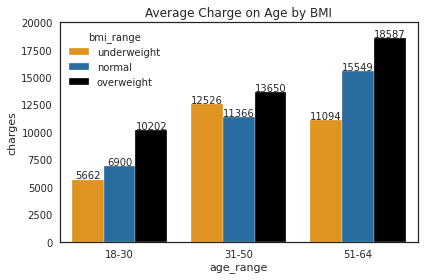

In [42]:
# charges by BMI and age
fig, ax = plt.subplots()
sns.barplot(x='age_range', y='charges', hue='bmi_range', ci=None, data=df, ax=ax).set(title='Average Charge on Age by BMI', ylim=(0,20000))

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


####**Charges by BMI and Region**
We notice that insurance charges on women who are underweight and with normal weight are higher than for men on the same range.

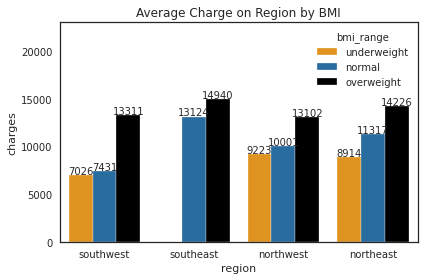

In [43]:
# charges by BMI and region
fig, ax = plt.subplots()
sns.barplot(x='region', y='charges', hue='bmi_range', ci=None, data=df, ax=ax).set(title='Average Charge on Region by BMI', ylim=(0,23000))

for p in ax.patches:
  height = p.get_height()
  ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s='{:.0f}'.format(height), ha='center')

plt.tight_layout()


###**2.6 Descriptive Statistics**
We have four numeric variables, and at first glance, we can notice that `charges` variable has an extreme higher maximum value, far above the 75% values, which indicates the presence of outliers. As it is the target variable, we will check it more carefully at the end of this section, using Box Plot chart in order to better identify it.

In [44]:
# statistical sum up
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

###**2.7 Checking for Outliers**
Although there is a lot of information we can extract from our dataset, we have to keep in mind that the aim of this project is to calculate a predictive model that will forecast insurance charges for new clients with maximum accuracy possible. 

However, when we have outliers, they can misguide our mode, creating a bias. So the first thing to do is to remove them.

Let's start by plotting the Box Plot for outliers detection:

####**2.7.1 Box Plot**

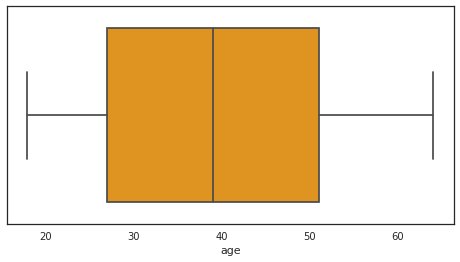

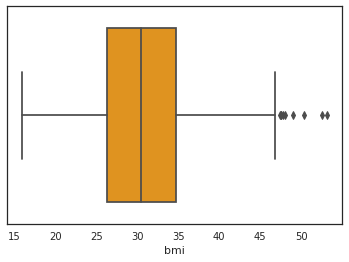

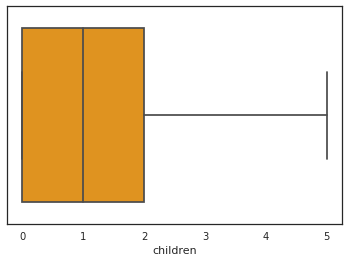

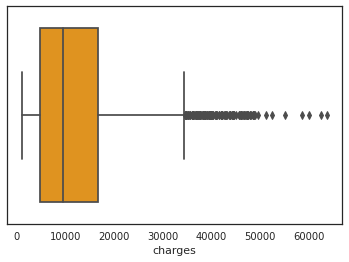

In [45]:
# boxplots quantitative data
plt.figure(figsize=(8,4))
x=df.drop(['sex', 'smoker', 'region', 'bmi_range', 'age_range'], axis=1) 

for i in x.columns:
  sns.boxplot(x=i, data=df)
  plt.xlabel(i)
  plt.show()

We can see above that, for our target variable `charge`, there are several outliers above around 35 thousand dollars. We want to adjust the target feature ideally eliminating them, depending on the number of outliers. Remember that it is not interesting to remove too much data. 

We also will plot the Box Plot for `charges` variable by different features, like gender, smoker status, region and so on, to see where they appear more often:

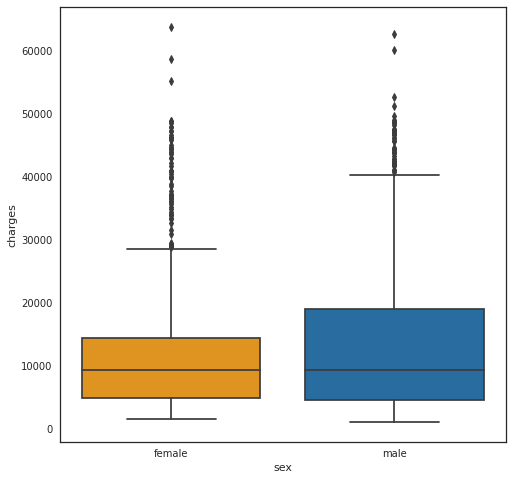

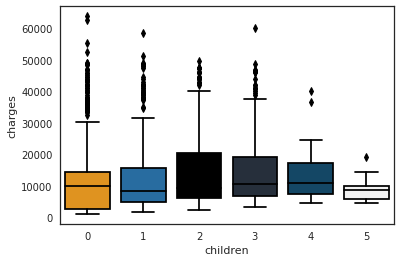

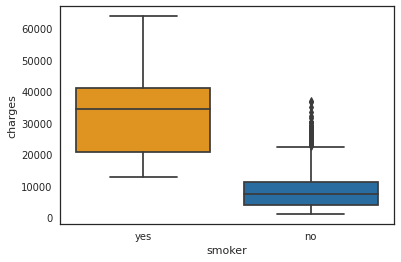

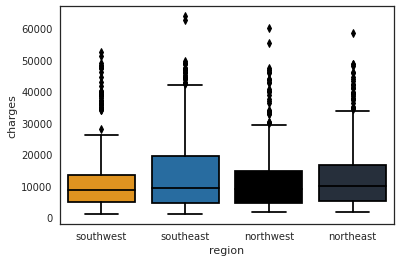

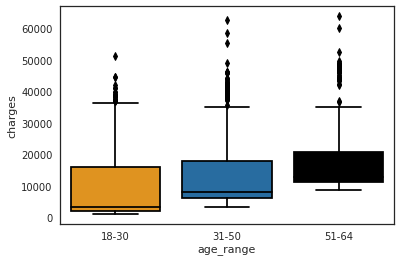

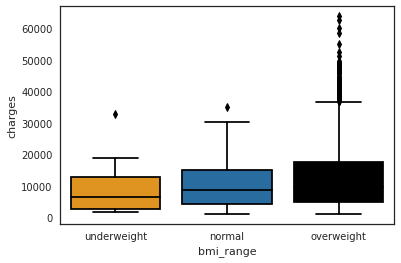

In [46]:
# boxplot charges by qualitative features
plt.figure(figsize=(8,8))
x=df.drop(['bmi', 'age', 'charges'], axis=1)

for i in x.columns:
  sns.boxplot(x=i, y='charges', data=df)
  plt.xlabel(i)
  plt.show()

Now, we will check how many outliers are there in `charges` feature to check if it's reasonable to remove them (without eliminating too much data). 

####**2.7.2 Counting Outliers**

In [47]:
# counting outliers values above 35000
print('Charges above 35 thousand: {} entries, that represents {:.1f}% of the total entries.'.format(len(df[df['charges']>35000]), len(df[df['charges']  > 35000])/df.shape[0]*100))


Charges above 35 thousand: 133 entries, that represents 9.9% of the total entries.


As the outliers above 35 thousand account for practically 10% of the dataset entries, we will raise the value for 42 thousand. We do not want to eliminate 10% of the dataset.

In [48]:
# counting outliers values above 42000
print('Charges above 42 thousand: {} entries, that represents {:.1f}% of the total entries.'.format(len(df[df['charges']>42000]), len(df[df['charges']  > 42000])/df.shape[0]*100))


Charges above 42 thousand: 62 entries, that represents 4.6% of the total entries.


####**2.7.3 Removing Outliers**

So we will remove these 62 outliers, which account for 4.6% of the total entries. In order to remove them, we will create a copy of the original dataframe with the remaining entries:

In [49]:
# removing the outliers
dfc = df.copy()
dfc.drop(dfc[dfc.charges > 42000].index, axis=0, inplace=True)
print('Original df has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print('New dataframe dfc has {} rows and {} columns'.format(dfc.shape[0], dfc.shape[1]))

Original df has 1338 rows and 9 columns
New dataframe dfc has 1276 rows and 9 columns


As we can see above, the new dataset (dfc) has fewer rows, as we eliminated the outliers. Next, we can check how the statistics of the `charges` variable changed after removing  them: 

Notice that the mean, median, standard deviation and all other statistics reduced, with the charge mean decreasing from 13.2 thousand to 11.6 thousand.

In [50]:
print('df charges statistics\n\n {} \n\n\n dfc charges statistics\n\n {}'.format(df.charges.describe(), dfc.charges.describe()))

df charges statistics

 count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64 


 dfc charges statistics

 count     1276.000000
mean     11633.084875
std       9739.323333
min       1121.873900
25%       4556.950075
50%       8853.208325
75%      14255.004350
max      41999.520000
Name: charges, dtype: float64


###**2.8 Correlation Matrix**
Plotting the correlation matrix for the quantitative variables, we can see that `charges` variable is explained mostly by `age` variable, that means, the higher the age, the higher the charge. The other cariables present a weaker correlation to the `charge` variable. 

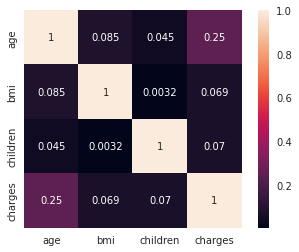

In [51]:
# correlation matrix
correl = dfc.corr()
sns.heatmap(correl, annot=True, square=True)
plt.show()

##**3. Preparing Data**

After the exploratory analysis, it is time to prepare the data variables so they can be used as an input to calculate a model to explain and predict the insurance charges for new users. Tipically, data preparation can be done through:
* removing unnecessary variables
* transforming existing variables 
* creating new variables

Remember that we transformed some data in the previous section. It is the case for `age` and `bmi` variables, that we binned into `age_range`, with 3 bins, and `bmi_range`, also separated into 3 categories. Thus, it became clearer the impact of each of these categories on the `charge` variable.

* `age` => `age_range`: ['18-30', '31-50', '51-64']
* `bmi` => `bmi_range`: ['underweight', 'normal', 'overweight']


###**3.1 Feature Encoding**
As we do not want to drop any variable, we will start by transforming the variables. 

Basically, we want the categorical variables to be transformed into numerical variables, so the algorithm can understand these columns when calculating the best model. So, we want that binary variables like `smoke` and `sex` are transformed from **'yes' or 'no'**, or **'male' or 'female'** to **'0' and '1'**. 

What about variables with more than 2 options? Let's take the `region` variable: instead of showing the regions in one column, we will create one column for each region, and assign the number 1 for the entry pertaining to that region, and the number 0 if the entry does not belong to that region. For doing this, we will apply the `pd.get_dummies()` method:

In [52]:
# transform variables: categorical to numerical
dfc['sex'] = dfc['sex'].map({'female':0, 'male':1}) 
dfc['smoker'] = dfc['smoker'].map({'no':0, 'yes':1})
data_dummies = pd.get_dummies(dfc)
data_dummies

age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400                 0   
1      18    1  33.770         1       0   1725.55230                 0   
2      28    1  33.000         3       0   4449.46200                 0   
3      33    1  22.705         0       0  21984.47061                 0   
4      32    1  28.880         0       0   3866.85520                 0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830                 0   
1334   18    0  31.920         0       0   2205.98080                 1   
1335   18    0  36.850         0       0   1629.83350                 0   
1336   21    0  25.800         0       0   2007.94500                 0   
1337   61    0  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  age_range_18-30  \
0                    0                 0                 1                1   
1                    0                 1                 0                1   
2                    0                 1                 0                1   
3                    1                 0                 0                0   
4                    1                 0                 0                0   
...                ...               ...               ...              ...   
1333                 1                 0                 0                0   
1334                 0                 0                 0                1   
1335                 0                 1                 0                1   
1336                 0                 0                 1                1   
1337                 1                 0                 0                0   

      age_range_31-50  age_range_51-64  bmi_range_underweight  \
0                   0                0                      0   
1                   0                0                      0   
2                   0                0                      0   
3                   1                0                      0   
4                   1                0                      0   
...               ...              ...                    ...   
1333                1                0                      0   
1334                0                0                      0   
1335                0                0                      0   
1336                0                0                      0   
1337                0                1                      0   

      bmi_range_normal  bmi_range_overweight  
0                    0                     1  
1                    0                     1  
2                    0                     1  
3                    1                     0  
4                    0                     1  
...                ...                   ...  
1333                 0                     1  
1334                 0                     1  
1335                 0                     1  
1336                 0                     1  
1337                 0                     1  

[1276 rows x 16 columns]

In [53]:
# compare variables before and after dummies
print('Number of variables before the transformation: {}'.format(len(dfc.columns)))
print('Number of variables after the transformation: {}'.format(len(data_dummies.columns)))

Number of variables before the transformation: 9
Number of variables after the transformation: 16


###**3.2 Feature Standardization**
Now that all of our data is numeric, we will focus on the numbers dimension: notice that some variables have a **smaller amplitude** (data range between 0 and 1), others have a **slightly higher amplitude** (variable `children`, from 0 to 6), and others, an even **higher amplitude**, like for `age`, `bmi` and `charges`.

But why is it important? Because we want to calculate a model to estimate the insurance value. But if, between the estimators, some variables are too high, and others too low, this dimension affects the parameters of the model. Thus, we have to tackle this issue by **bringing them to the same amplitude range**. And how do we do that? There are 2 ways: through `standardization` and `normalization`. These methods bring the different series amplitudes to similar ones. We will use the Standard Scaler.

In [54]:
# feature scaling
scaled_df = data_dummies.copy()
scaled_df[['age', 'bmi', 'children']] = StandardScaler().fit_transform(scaled_df[['age', 'bmi', 'children']])
scaled_df

age  sex       bmi  children  smoker      charges  \
0    -1.408315    0 -0.409107 -0.898992       1  16884.92400   
1    -1.479978    1  0.573155 -0.072541       0   1725.55230   
2    -0.763352    1  0.444307  1.580361       0   4449.46200   
3    -0.405039    1 -1.278418 -0.898992       0  21984.47061   
4    -0.476702    1 -0.245118 -0.898992       0   3866.85520   
...        ...  ...       ...       ...     ...          ...   
1333  0.813224    1  0.104615  1.580361       0  10600.54830   
1334 -1.479978    0  0.263584 -0.898992       0   2205.98080   
1335 -1.479978    0  1.088550 -0.898992       0   1629.83350   
1336 -1.264990    0 -0.760513 -0.898992       0   2007.94500   
1337  1.601512    0 -0.213324 -0.898992       1  29141.36030   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                    0                 0                 0                 1   
1                    0                 0                 1                 0   
2                    0                 0                 1                 0   
3                    0                 1                 0                 0   
4                    0                 1                 0                 0   
...                ...               ...               ...               ...   
1333                 0                 1                 0                 0   
1334                 1                 0                 0                 0   
1335                 0                 0                 1                 0   
1336                 0                 0                 0                 1   
1337                 0                 1                 0                 0   

      age_range_18-30  age_range_31-50  age_range_51-64  \
0                   1                0                0   
1                   1                0                0   
2                   1                0                0   
3                   0                1                0   
4                   0                1                0   
...               ...              ...              ...   
1333                0                1                0   
1334                1                0                0   
1335                1                0                0   
1336                1                0                0   
1337                0                0                1   

      bmi_range_underweight  bmi_range_normal  bmi_range_overweight  
0                         0                 0                     1  
1                         0                 0                     1  
2                         0                 0                     1  
3                         0                 1                     0  
4                         0                 0                     1  
...                     ...               ...                   ...  
1333                      0                 0                     1  
1334                      0                 0                     1  
1335                      0                 0                     1  
1336                      0                 0                     1  
1337                      0                 0                     1  

[1276 rows x 16 columns]

##**4. Machine Learning Model using PyCaret**
We prepared our data, now it is time to run the Machine Learning algorithm in order to find the model which best predicts the insurance charges for each new client. As we will run a regression, there are several models that can be tested. 

In this project, we will use the library `PyCaret` that automates this process.

In [55]:
# split the dataset into train and test
test = scaled_df.sample(frac=0.10)
train = scaled_df.drop(test.index)

test.reset_index(inplace = True, drop = True)
train.reset_index(inplace = True, drop = True)

In [56]:
# sets shape
print(train.shape)
print(test.shape)

(1148, 16)
(128, 16)


In [57]:
# creating pycaret setup
reg = setup(data=train, 
            target='charges',
            log_experiment=True,
            silent=True,
            use_gpu=True,
            experiment_name='charges01')

Description           Value
0                               session_id            4986
1                                   Target         charges
2                            Original Data      (1148, 16)
3                           Missing Values           False
4                         Numeric Features              13
5                     Categorical Features               2
6                         Ordinal Features           False
7                High Cardinality Features           False
8                  High Cardinality Method            None
9                    Transformed Train Set       (803, 15)
10                    Transformed Test Set       (345, 15)
11                      Shuffle Train-Test            True
12                     Stratify Train-Test           False
13                          Fold Generator           KFold
14                             Fold Number              10
15                                CPU Jobs              -1
16                                 Use GPU            True
17                          Log Experiment            True
18                         Experiment Name       charges01
19                                     USI            8105
20                         Imputation Type          simple
21          Iterative Imputation Iteration            None
22                         Numeric Imputer            mean
23      Iterative Imputation Numeric Model            None
24                     Categorical Imputer        constant
25  Iterative Imputation Categorical Model            None
26           Unknown Categoricals Handling  least_frequent
27                               Normalize           False
28                        Normalize Method            None
29                          Transformation           False
30                   Transformation Method            None
31                                     PCA           False
32                              PCA Method            None
33                          PCA Components            None
34                     Ignore Low Variance           False
35                     Combine Rare Levels           False
36                    Rare Level Threshold            None
37                         Numeric Binning           False
38                         Remove Outliers           False
39                      Outliers Threshold            None
40                Remove Multicollinearity           False
41             Multicollinearity Threshold            None
42             Remove Perfect Collinearity            True
43                              Clustering           False
44                    Clustering Iteration            None
45                     Polynomial Features           False
46                       Polynomial Degree            None
47                    Trignometry Features           False
48                    Polynomial Threshold            None
49                          Group Features           False
50                       Feature Selection           False
51                Feature Selection Method         classic
52            Features Selection Threshold            None
53                     Feature Interaction           False
54                           Feature Ratio           False
55                   Interaction Threshold            None
56                        Transform Target           False
57                 Transform Target Method         box-cox

INFO:logs:Logging experiment in MLFlow
2022/11/08 18:31:03 INFO mlflow.tracking.fluent: Experiment with name 'charges01' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scal

Now, we will use the `compare_models()` method in order to run the models. Just one line command is able to run different regression models, using cross validation and evaluating each one of them with six different metrics. According to it, the model with higher correlation and lower errors is the `Gradient Boosting Regressor`, with 76.5% R2. 


In [58]:
# find the best model
best=compare_models()

Model        MAE           MSE       RMSE  \
gbr           Gradient Boosting Regressor  2508.2679  2.104031e+07  4531.3692   
lightgbm  Light Gradient Boosting Machine  2824.7441  2.256071e+07  4668.6274   
rf                Random Forest Regressor  2628.2381  2.298100e+07  4719.5087   
ada                    AdaBoost Regressor  3925.0426  2.620680e+07  5067.4683   
et                  Extra Trees Regressor  2689.0689  2.653259e+07  5102.5006   
llar         Lasso Least Angle Regression  3651.5773  3.053322e+07  5476.5638   
ridge                    Ridge Regression  3672.5059  3.061878e+07  5484.7594   
br                         Bayesian Ridge  3672.6776  3.061994e+07  5484.8984   
lasso                    Lasso Regression  3670.9376  3.061447e+07  5484.5184   
lr                      Linear Regression  3672.9541  3.062488e+07  5485.5418   
lar                Least Angle Regression  3911.1680  3.364023e+07  5747.2738   
huber                     Huber Regressor  2599.4417  3.816266e+07  6103.8283   
par          Passive Aggressive Regressor  2605.5212  3.865551e+07  6143.8518   
dt                Decision Tree Regressor  2959.8573  4.142847e+07  6403.9238   
omp           Orthogonal Matching Pursuit  5107.8624  4.431947e+07  6614.4309   
knn                 K Neighbors Regressor  4561.3676  5.249799e+07  7156.3993   
en                            Elastic Net  5950.1971  6.535997e+07  8020.9392   
dummy                     Dummy Regressor  7226.2484  9.184742e+07  9522.7263   

              R2   RMSLE    MAPE  TT (Sec)  
gbr       0.7599  0.4125  0.2869     0.117  
lightgbm  0.7445  0.4958  0.3488     0.068  
rf        0.7384  0.4469  0.3159     1.632  
ada       0.7040  0.6107  0.6938     0.035  
et        0.6980  0.4680  0.3211     1.035  
llar      0.6598  0.5037  0.4023     0.039  
ridge     0.6589  0.5008  0.4061     0.034  
br        0.6589  0.5020  0.4058     0.047  
lasso     0.6588  0.5107  0.4040     0.039  
lr        0.6587  0.5225  0.4043     0.023  
lar       0.6247  0.5535  0.4412     0.051  
huber     0.5818  0.3939  0.1384     0.203  
par       0.5764  0.4000  0.1400     0.082  
dt        0.5165  0.5045  0.3311     0.020  
omp       0.5031  0.7316  0.8798     0.032  
knn       0.4238  0.5896  0.4925     0.341  
en        0.2792  0.7564  0.9398     0.018  
dummy    -0.0187  0.9249  1.3132     0.006

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [59]:
# check the parameters from the chosen model
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


The `compare_models()` function works with the available data and performs the best models at their basic level. However, once we choose the best model, it is possible to **check their accuracy** by performing **stratified cross validation**, with `create_model()`. The train dataset will be split into 10 folds, one will be set as a test set, the model will be trained on the other nine train sets, and the accuracy measured on the test set. This process will take place 10 times, so each fold will 'have the opportunity' to be run as a test set. Then, all the evaluation results will be compared and an average will be done. Then, you can see how the R2 of 76.5% was obtained. Some folds reached almost 83% R2, while others were below 70%. But as we can see below, it is also possible to specify the number of folds.

In [66]:
# instanciate the chosen model to perform cross validation
gbr = create_model('gbr')

MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                            
0     2012.2092  1.450999e+07  3809.1984  0.8285  0.3959  0.2909
1     2687.4780  2.287524e+07  4782.8070  0.8034  0.3666  0.2445
2     2422.0351  1.668531e+07  4084.7655  0.7492  0.3969  0.3193
3     3079.3387  2.894087e+07  5379.6721  0.7292  0.4562  0.2791
4     2337.1321  2.399816e+07  4898.7917  0.7039  0.4619  0.2533
5     2418.0859  1.621620e+07  4026.9338  0.8173  0.3399  0.2987
6     1899.1169  1.018419e+07  3191.2679  0.8950  0.3330  0.2653
7     2685.3260  2.534054e+07  5033.9390  0.6629  0.4555  0.2483
8     2762.6794  2.036614e+07  4512.8861  0.6588  0.4862  0.3684
9     2779.2776  3.128647e+07  5593.4307  0.7511  0.4334  0.3006
Mean  2508.2679  2.104031e+07  4531.3692  0.7599  0.4125  0.2869
Std    344.9282  6.334062e+06   712.0423  0.0721  0.0513  0.0360

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 9
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [67]:
gbr = create_model('gbr', fold=7)

MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                            
0     2367.8705  1.808693e+07  4252.8726  0.8097  0.4021  0.3116
1     2472.4180  1.802037e+07  4245.0412  0.8055  0.4021  0.2946
2     2867.9875  2.524028e+07  5023.9706  0.7312  0.4710  0.2801
3     2250.1748  2.068319e+07  4547.8774  0.7772  0.3767  0.2501
4     2248.3011  1.428127e+07  3779.0566  0.8321  0.3866  0.2994
5     2676.8202  2.455949e+07  4955.7528  0.6802  0.4674  0.2736
6     2511.8281  2.433272e+07  4932.8205  0.7628  0.4284  0.3061
Mean  2485.0572  2.074346e+07  4533.9131  0.7712  0.4192  0.2879
Std    210.1839  3.852683e+06   432.5450  0.0484  0.0350  0.0199

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 10
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Now, we proceed to the model tuning. Yes, `compare_model()` and `create_model()` use the default model, with default parameters. PyCaret has a function to optimize them, `tune_model()`.

In [68]:
# tuning the chosen model
tuned_gbr = tune_model(gbr, optimize='R2')

MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                            
0     2237.6602  1.403182e+07  3745.9070  0.8341  0.6030  0.3534
1     3145.0418  2.710449e+07  5206.1973  0.7671  0.4166  0.3063
2     2855.1336  1.826798e+07  4274.1060  0.7254  0.5023  0.4358
3     3658.8764  3.550799e+07  5958.8585  0.6677  0.6118  0.3532
4     2935.4430  2.946799e+07  5428.4424  0.6364  0.5392  0.3196
5     2380.4958  1.564576e+07  3955.4727  0.8237  0.4063  0.3050
6     2419.1712  1.370154e+07  3701.5588  0.8587  0.4740  0.4235
7     2931.1470  2.944984e+07  5426.7705  0.6082  0.5621  0.3010
8     3240.6246  2.348536e+07  4846.1697  0.6066  0.5702  0.4680
9     3489.7340  3.720020e+07  6099.1964  0.7041  0.6265  0.4235
Mean  2929.3328  2.438630e+07  4864.2679  0.7232  0.5312  0.3689
Std    451.1275  8.262938e+06   851.5836  0.0897  0.0749  0.0598

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 11
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=11, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [69]:
# print tuned model
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=11, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


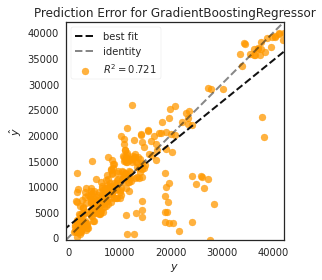

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [76]:
# plot errors
plot_model(tuned_gbr, plot='error')

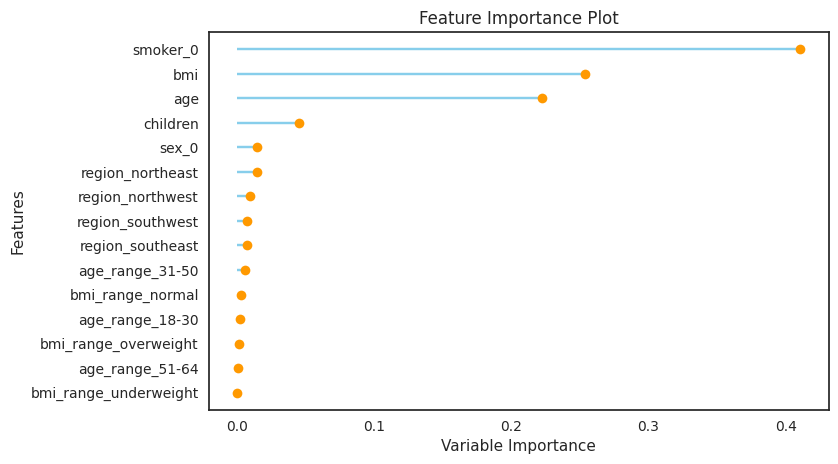

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [82]:
# plot feature importance
plot_model(tuned_gbr, plot='feature_all')

The `Feature Importance Plot` shows the degree of influence of each feature on the target variable `charges`. As we can see, `smoker`, `bmi` and `age` play a more important role on the model than the other ones, as expected.

##**5. Making Predictions**
In the last section, we found the best model and adjusted it, calculating the parameters. We also checked the importance of the features. Now, it is time to put the model to the test.

In [85]:
# making predictions
predict_model(tuned_gbr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=11, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing dis

Model        MAE           MSE       RMSE     R2  \
0  Gradient Boosting Regressor  3052.9896  2.602566e+07  5101.5351  0.721   

    RMSLE    MAPE  
0  0.6195  0.3896

age       bmi  children  region_northeast  region_northwest  \
0    0.741561  0.327171  1.580361                 0                 1   
1   -1.408315  1.106121 -0.898992                 0                 1   
2    0.024936  0.360639 -0.072541                 0                 0   
3    1.243199 -0.340499 -0.898992                 1                 0   
4   -1.121665 -1.946088 -0.898992                 0                 1   
..        ...       ...       ...               ...               ...   
340 -0.978340 -0.292809 -0.898992                 1                 0   
341  0.669899 -0.752146  1.580361                 0                 0   
342  0.669899 -0.107902 -0.898992                 0                 0   
343 -0.548365 -0.292809 -0.072541                 0                 1   
344  0.956549 -0.660111  1.580361                 0                 0   

     region_southeast  region_southwest  age_range_18-30  age_range_31-50  \
0                   0                 0                0                1   
1                   0                 0                1                0   
2                   0                 1                0                1   
3                   0                 0                0                0   
4                   0                 0                1                0   
..                ...               ...              ...              ...   
340                 0                 0                1                0   
341                 1                 0                0                1   
342                 1                 0                0                1   
343                 0                 0                0                1   
344                 1                 0                0                0   

     age_range_51-64  bmi_range_underweight  bmi_range_normal  \
0                  0                      0                 0   
1                  0                      0                 0   
2                  0                      0                 0   
3                  1                      0                 0   
4                  0                      0                 1   
..               ...                    ...               ...   
340                0                      0                 0   
341                0                      0                 0   
342                0                      0                 0   
343                0                      0                 0   
344                1                      0                 0   

     bmi_range_overweight  sex_0  smoker_0       charges         Label  
0                       1    0.0       1.0  10269.459961   8366.726865  
1                       1    0.0       0.0  36219.406250  36890.558411  
2                       1    1.0       1.0   6238.297852   5266.961440  
3                       1    1.0       1.0  11657.718750  11740.803594  
4                       0    0.0       1.0  21595.382812   1342.205262  
..                    ...    ...       ...           ...           ...  
340                     1    1.0       1.0   3213.622070   8928.953695  
341                     1    1.0       0.0  24180.933594  21949.253045  
342                     1    0.0       1.0   7789.634766  15761.815132  
343                     1    0.0       1.0   4243.589844   4616.557964  
344                     1    0.0       1.0  25992.820312  12109.880290  

[345 rows x 17 columns]

###**Finalizing the model and making predictions on the Test Set**
We have to keep in mind that at the beginning, we split the data into train and test set, and worked the modeling through the train set. For the stratified cross validation, the train test was split into 10 folds, being one test subset and 9 train subsets. We worked on this data. 

But now, we have to finalize the model. What is it to finalize a model? It will train on the whole original train set, and have a resulting performance slightly different from the one of the subsets. It is working with known data.

Finally, we are going to run the model on unknown data, the original test set. So it is important to specify inside `finalize_model()` that we are working with the test set, with the argument `data=test`. And we will see that the R2 increased a bit, from 72% to 75%. Then, we can print the data and compare the model results, that appear on the Label column (last column). 

Next, we finish by saving the model using `save_model()` function.

In [90]:
# finalizing the model
final_gbr = finalize_model(tuned_gbr);

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=11, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learn

In [89]:
# forecast in unseen data
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=11, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4986, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing dis

Model        MAE           MSE       RMSE      R2  \
0  Gradient Boosting Regressor  2951.8692  2.818909e+07  5309.3401  0.7594   

    RMSLE    MAPE  
0  0.5378  0.3312

age  sex       bmi  children  smoker      charges  region_northeast  \
0  0.526574    1  0.502038 -0.072541       0   8334.45755                 1   
1  1.099874    0  0.149795 -0.898992       0  10338.93160                 0   
2 -1.336653    0 -0.261015 -0.898992       0   2457.21115                 1   
3  0.239924    0  0.470244 -0.072541       0   7639.41745                 1   
4 -0.118389    1  0.628376  2.406812       1  40182.24600                 0   

   region_northwest  region_southeast  region_southwest  age_range_18-30  \
0                 0                 0                 0                0   
1                 0                 1                 0                0   
2                 0                 0                 0                1   
3                 0                 0                 0                0   
4                 0                 0                 1                0   

   age_range_31-50  age_range_51-64  bmi_range_underweight  bmi_range_normal  \
0                1                0                      0                 0   
1                0                1                      0                 0   
2                0                0                      0                 0   
3                1                0                      0                 0   
4                1                0                      0                 0   

   bmi_range_overweight         Label  
0                     1   9904.017899  
1                     1  14528.490194  
2                     1   2152.677631  
3                     1   7633.030135  
4                     1  40109.870578

##**6. Conclusion**
The aim of this project was to find a model to predict insurance premium based on a Kaggle dataset. We went through some determined steps in order to understand the problem and build some hypothesis. 

For this, we used Exploratory Data Analysis to analyze the data by building several charts that offered a view on the distribution and relation between the feature characteristics (sex, age, smoke, BMI, etc) and the insurance charge. We also performed a statistical analysis, found outliers and removed them. 

Next, we prepared the data through feature encoding and standardization. It's worthy to notice here that we could do all of these steps, including removing the outliers, inside PyCaret. We chose to do it step by step for exercise purpose. 

Then, we proceeded to the Machine Learning part, using PyCaret to build a regression model and make predictions. The advantage of this package is to perform a higher amount of calculations with just a few lines of code, compared to doing it 'manually'. We obtained a model with about 75% accuracy, which could have been improved applying other techniques. 

